# Create a CNN to classify Cifar-10

Learn about Cifar-10 here: https://www.cs.toronto.edu/~kriz/cifar.html

In class you saw how to build a Convolutional Neural Network that classified Fashion MNIST. Take what you learned to build a CNN that recognizes the 10 classes of CIFAR. It will be a similar network, but there are some key differences you'll need to take into account.

First, while MNIST were 28x28 monochome images (1 color channel), CIFAR are 32x32 color images (3 color channels).

Second, MNIST images are simple, containing just the object, centered in the image, with no background. CIFAR ones can have the object with a background -- for example airplanes might have a cloudy sky behind them! As such you should expect your accuracy to be a bit lower. 

We start by setting up the problem for you.

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

170508288/170498071 [==============================] - 6s 0us/step


We then definte some of the model for you but leave most of it for you to fill in! 

*A hint: your model may want to learn some high level features and then classify them.*

In [2]:
FIRST_LAYER = layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))
HIDDEN_LAYER_TYPE_1 = layers.MaxPooling2D((2,2))
HIDDEN_LAYER_TYPE_2 = layers.Conv2D(64, (3, 3), activation='relu')
HIDDEN_LAYER_TYPE_3 = layers.MaxPooling2D((2, 2))
HIDDEN_LAYER_TYPE_4 = layers.Conv2D(64,(3, 3), activation='relu')
HIDDEN_LAYER_TYPE_5 = layers.Dense(64, activation='relu')
LAST_LAYER = layers.Dense(10)

model = models.Sequential([
       FIRST_LAYER,
       HIDDEN_LAYER_TYPE_1,
       HIDDEN_LAYER_TYPE_2,
       HIDDEN_LAYER_TYPE_3,
       HIDDEN_LAYER_TYPE_4,
       layers.Flatten(),
       HIDDEN_LAYER_TYPE_5,
       LAST_LAYER,
])

You then need to define loss function. And you can then train your model. Once training is done you'll see a plot of training and validation accuracy. You'll know you have a reasonable model with a reasonable loss funciton if your final training accuracy ends up in the 70s (or possibly higher).

*A hint: your model may want to learn different categories.*

Epoch 1/20
1563/1563 [==============================] - 40s 7ms/step - loss: 2.0771 - accuracy: 0.2341 - val_loss: 1.8383 - val_accuracy: 0.3479
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7131 - accuracy: 0.3807 - val_loss: 1.6267 - val_accuracy: 0.4128
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5073 - accuracy: 0.4551 - val_loss: 1.5990 - val_accuracy: 0.4212
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3761 - accuracy: 0.5075 - val_loss: 1.3250 - val_accuracy: 0.5185
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2758 - accuracy: 0.5485 - val_loss: 1.2196 - val_accuracy: 0.5694
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2003 - accuracy: 0.5803 - val_loss: 1.2659 - val_accuracy: 0.5550
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1377 - accuracy: 0.6004 - val_loss: 1.0995 - val_ac

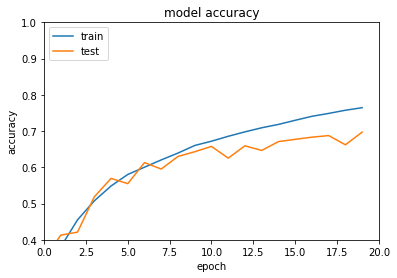

In [3]:
LOSS = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
NUM_EPOCHS = 20 #You can change this value if you like to experiment with it to get better accuracy

# Compile the model
model.compile(optimizer='sgd',
              loss=LOSS,
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS, 
                    validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

Finally, pick a better optimizer. And re-train your model. You'll know you have a reasonable model with a reasonable loss funciton and optimizer if your final training accuracy ends up in the 80s (or possibly higher).

*A hint: your model may want to learn adaptively.*

Epoch 1/20
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8673 - accuracy: 0.6983 - val_loss: 0.9691 - val_accuracy: 0.6605
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7773 - accuracy: 0.7306 - val_loss: 0.8826 - val_accuracy: 0.6954
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6939 - accuracy: 0.7568 - val_loss: 0.8888 - val_accuracy: 0.6942
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6210 - accuracy: 0.7825 - val_loss: 0.9012 - val_accuracy: 0.6957
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5550 - accuracy: 0.8047 - val_loss: 0.9168 - val_accuracy: 0.7019
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4906 - accuracy: 0.8262 - val_loss: 0.9341 - val_accuracy: 0.7053
Epoch 7/20
1563/1563 [==============================] - 12s 7ms/step - loss: 0.4422 - accuracy: 0.8440 - val_loss: 0.9511 - val_ac

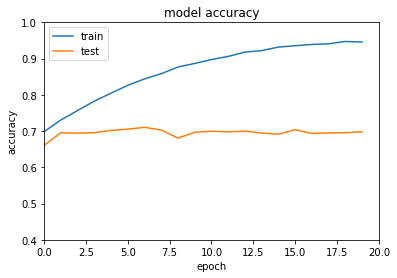

In [4]:
OPTIMIZER = 'adam'

# Compile the model
model.compile(optimizer=OPTIMIZER,
              loss=LOSS,
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS, 
                    validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()